The outermost pixels (outline) can be retrieved by computing the difference to the eroded image.

In this approach a label is attributed to each corner (e.g. top left tl). The trace is then found by moving along the outline clockwise and adding the respective corner values.

The implementation does not work e.g. to trace a rectangle with 

In [20]:
from collections import defaultdict
import numpy as np
from scipy.ndimage import gaussian_filter, binary_erosion

def left_border_pixel(array, pos):
    return array[pos[0], pos[1]-1] == 0

def right_border_pixel(array, pos):
    return array[pos[0], pos[1]+1] == 0

def top_border_pixel(array, pos):
    return array[pos[0]-1, pos[1]] == 0

def bottom_border_pixel(array, pos):
    return array[pos[0]+1, pos[1]] == 0

def get_outline(array, corners_only = False):
    outline = np.logical_xor(array,binary_erosion(array))

    where = np.array(np.where(outline))
    edge_type = np.ndarray(array.shape, dtype=object)
    coord = []
    for y, x in where.T:
        assert array[y,x] == True
        l = left_border_pixel(array, [y,x])
        r = right_border_pixel(array, [y,x])
        t = top_border_pixel(array, [y,x])
        b = bottom_border_pixel(array, [y,x])
        
        tl = t and l#upper left corner
        tr = t and r
        bl = b and l
        br = b and r
        
        edge_type[y][x] = []
        
        if tl:
            edge_type[y][x].append("tl")
        if tr:
            edge_type[y][x].append("tr")
        if bl:
            edge_type[y][x].append("bl")
        if br:
            edge_type[y][x].append("br")
                    
    trace = []
    y, x = where.T[0]
    trace_closed = False
    while True:
        plt.imshow(outline)
        plt.show()
        outline[y,x] = 0
        edge = edge_type[y][x]

        if "bl" in edge:
            trace.append([y+0.5,x-0.5])#bottom left corner
        if "tl" in edge:
            trace.append([y-0.5,x-0.5])#top left corner
        if "tr" in edge:
            trace.append([y-0.5,x+0.5])#top right corner
        if "br" in edge:
            trace.append([y+0.5,x+0.5])#bottom right corner
        

        #Search for neighborig pixel
        if outline[y-1,x] == 1:#prefer going up
            print("up")
            y, x = [y-1,x]
            outline[y,x] = 0
            continue
        if outline[y-1,x+1] == 1:#prefer going up right
            print("up right")
            trace.append([y-0.5,x+0.5])#top right corner
            y, x = [y-1,x+1]
            outline[y,x] = 0
            continue
        if outline[y,x+1] == 1:#prefer going right otherwise
            print("right")
            y, x = [y,x+1]
            outline[y,x] = 0
            continue
        if outline[y+1,x+1] == 1:#prefer going right down otherwise
            print("down right")
            trace.append([y+0.5,x+0.5])#bottom right corner
            y, x = [y+1,x+1]
            outline[y,x] = 0
            continue
        if outline[y+1,x] == 1:#prefer going down otherwise
            print("down")
            y, x = [y+1,x]
            outline[y,x] = 0
            continue
        if outline[y+1,x-1] == 1:#prefer going down left otherwise
            print("down left")
            trace.append([y+0.5,x-0.5])#bottom left corner
            y, x = [y+1,x-1]
            outline[y,x] = 0
            continue
        if outline[y,x-1] == 1:#prefer going left otherwise
            print("left")
            y, x = [y,x-1]
            outline[y,x] = 0
            continue
        if outline[y-1,x-1] == 1:#prefer left up
            print("left up")
            trace.append([y-0.5,x-0.5])#top left corner
            y, x = [y-1,x-1]
            outline[y,x] = 0
            continue
        #no neighboring pixel, nowhere to go: Close trace
        if trace_closed == False:
            trace_closed = True
            y1, x1 = where.T[0]
            outline[y1,x1] = 1
            print("closing")
            continue
        break#no neighboring pixel, nowhere to go



    trace.append(trace[0])
    trace = np.array(trace).T
    y = trace[0]
    x = trace[1]
    return x, y, edge_type

# Test get outline

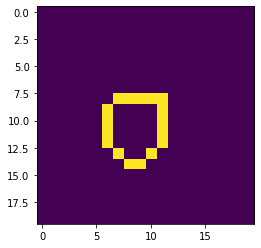

right


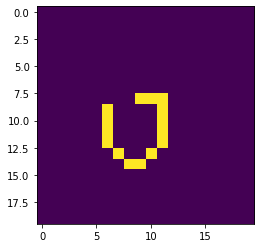

right


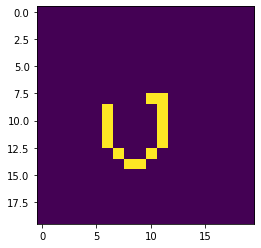

right


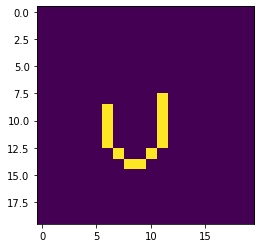

right


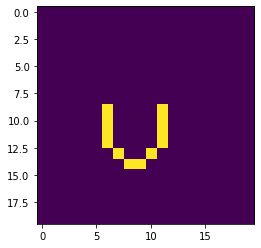

down


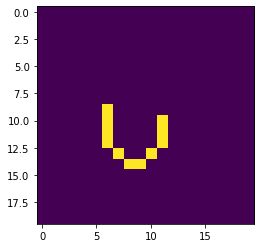

down


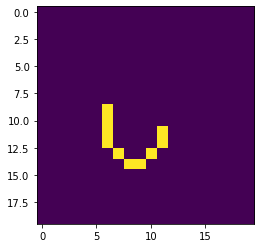

down


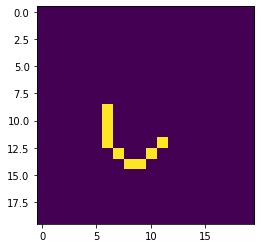

down


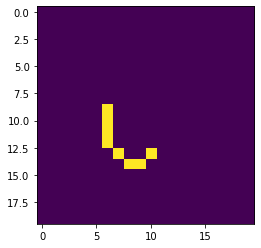

down left


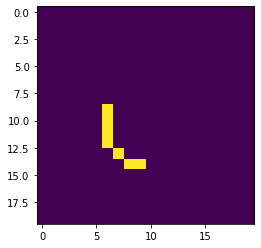

down left


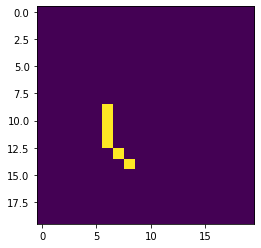

left


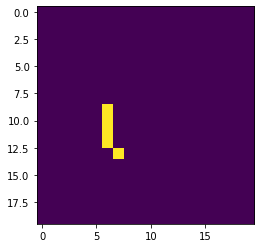

left up


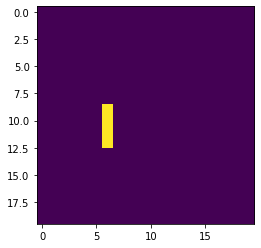

left up


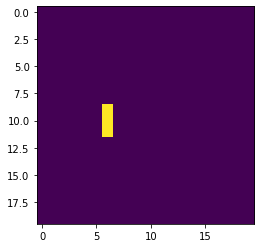

up


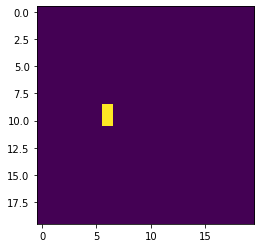

up


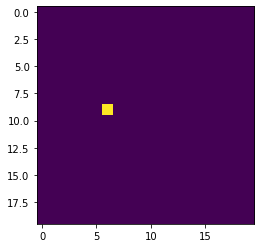

up


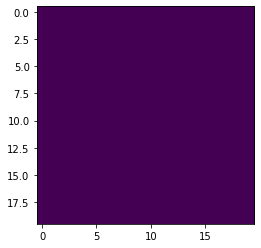

closing


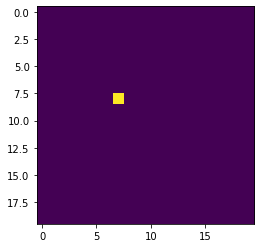

up right


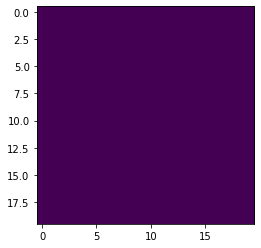

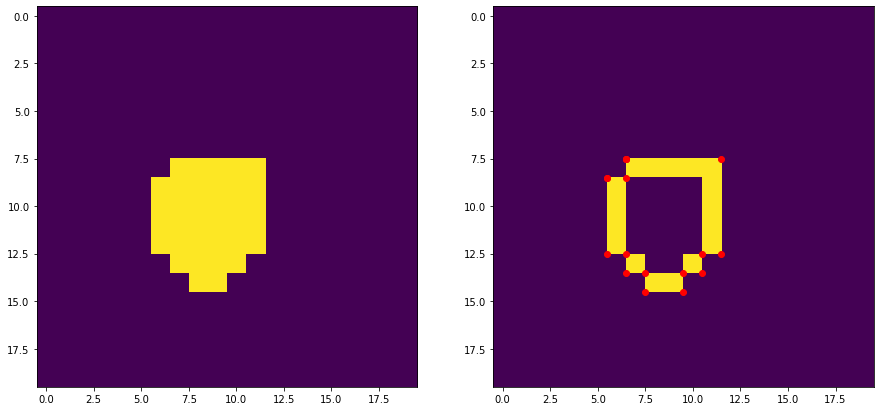

In [21]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[13,6]= 0
test_array[14:15,8:10] = 1

x, y, edge_type = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
plt.scatter(x, y, color ="r")

right
right
right
bottom right
down
down
down
down left
left
left
left
left up
up
up
up
closing
up right


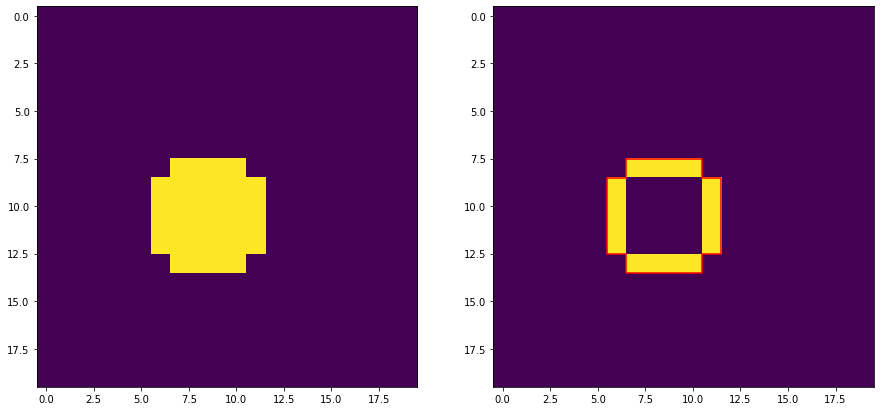

In [9]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[8,11] = 0

test_array[13,6]= 0


x, y, edge_type = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
plt.plot(x, y, color ="r")

closing


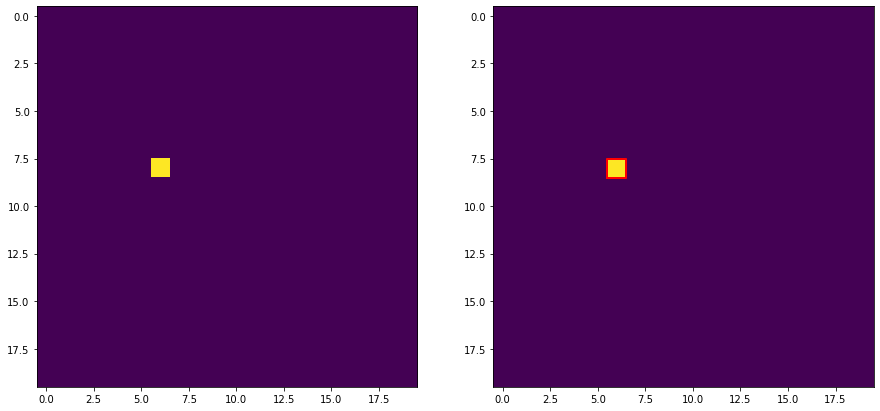

In [10]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:9,6:7] = 1

x, y, edge_type = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
plt.plot(x, y, color ="r")

right
right
right
right
down
down
down
down
down left
left
left
left
left up
up
right
up right
left up
left
closing
up right


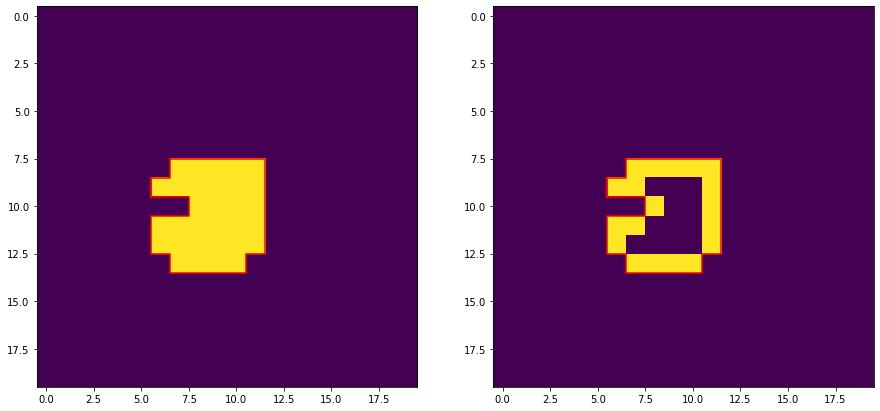

In [11]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[13,6] = 0
test_array[10,:8] = 0

x, y, edge_type = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
ax[0].plot(x, y, color ="r")
ax[1].plot(x, y, color ="r")

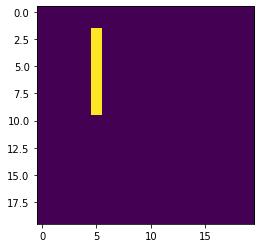

down


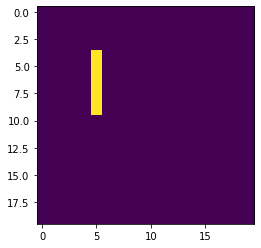

down


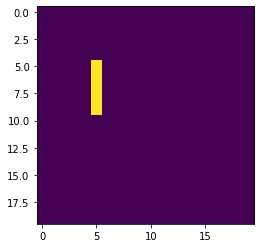

down


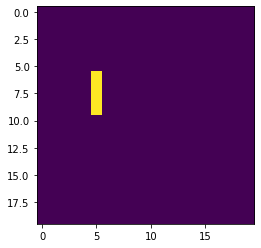

down


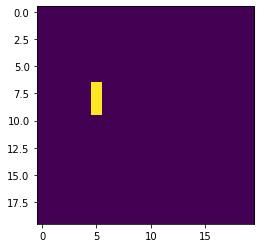

down


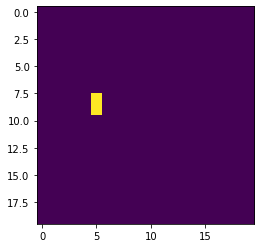

down


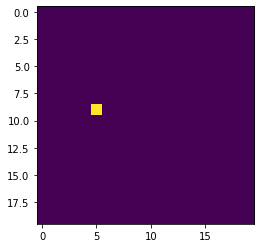

down


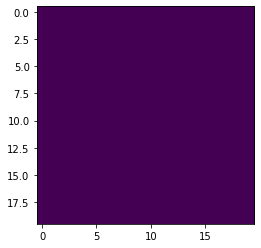

closing


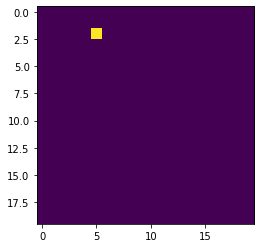

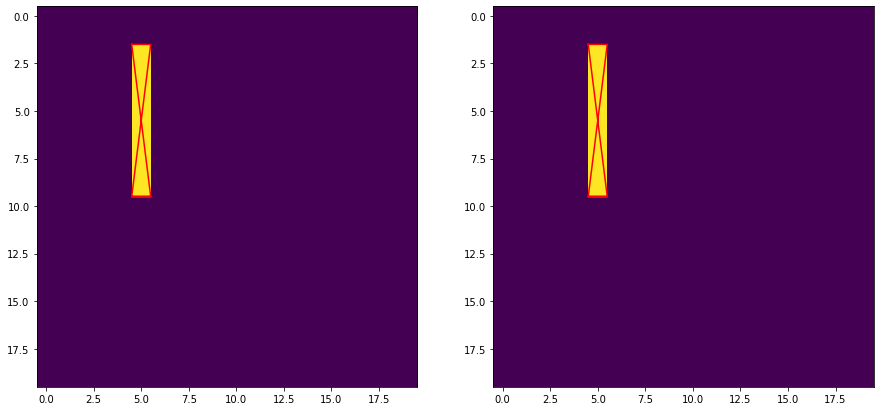

In [19]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])

test_array[2:10,5:6] =1

x, y, edge_type = get_outline(test_array)

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))
ax[0].plot(x, y, color ="r")
ax[1].plot(x, y, color ="r")

In [161]:
import matplotlib.pyplot as plt

In [35]:
eroded = np.logical_xor(test_array,binary_erosion(test_array))

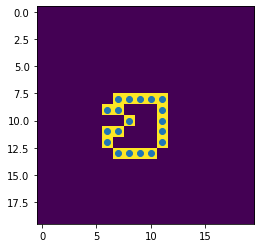

In [62]:
plt.imshow(eroded)
y, x = np.array(np.where(eroded), dtype=np.float)
plt.scatter(x, y)